In [1]:
import pandas as pd 
import numpy as np
from tqdm.notebook import tqdm 
tqdm().pandas() 
pd.options.display.max_columns = 1000 
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(10, 7)

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics 

In [4]:
df_train = pd.read_csv('../../kaggle/pubg_kaggle/input/train_V2.csv', nrows=100000)

In [5]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [47]:
df_train['target'] = (df_train['winPlacePerc'] > 0.999).astype(np.int8)
drop_cols = ['matchType', 'Id', 'groupId', 'matchId', # id которые затруднительно напрямую использовать
             'winPlacePerc', 'target'] # связаны с таргетом

df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(-1, inplace=True)

X = df_train.drop(drop_cols, 1)
y = df_train['target']

# Метрики классификации

In [48]:
from sklearn.model_selection import train_test_split

seed = 0xEDA # 16-ричный инт
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=seed)

In [49]:
y_train.mean(), y_test.mean()

(0.02832857142857143, 0.029566666666666668)

In [50]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)

/home/basil/mlenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
predictions = lr.predict(X_test)
probability_predictions = lr.predict_proba(X_test)

In [38]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [39]:
# здесь вероятности за 0 и 1 классы (или за большее число классов)
probability_predictions

array([[9.99367140e-01, 6.32860187e-04],
       [9.99777279e-01, 2.22720702e-04],
       [9.71086526e-01, 2.89134742e-02],
       ...,
       [9.99952139e-01, 4.78608171e-05],
       [9.99243026e-01, 7.56974034e-04],
       [9.99905987e-01, 9.40134378e-05]])

In [26]:
metrics.accuracy_score(y_test, predictions)

0.9382333333333334

In [13]:
metrics.confusion_matrix(y_test, predictions)

array([[15122,  1164],
       [ 1611, 12103]])

In [24]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     16286
           1       0.91      0.88      0.90     13714

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



In [28]:
metrics.precision_score(y_test, predictions, pos_label=1)

0.6158273381294964

In [29]:
metrics.recall_score(y_test, predictions)

0.21251241310824232

In [16]:
metrics.f1_score(y_test, predictions)

0.8971498461880584

In [41]:
metrics.roc_auc_score(y_test, probability_predictions[:,1])

0.9233872432319421

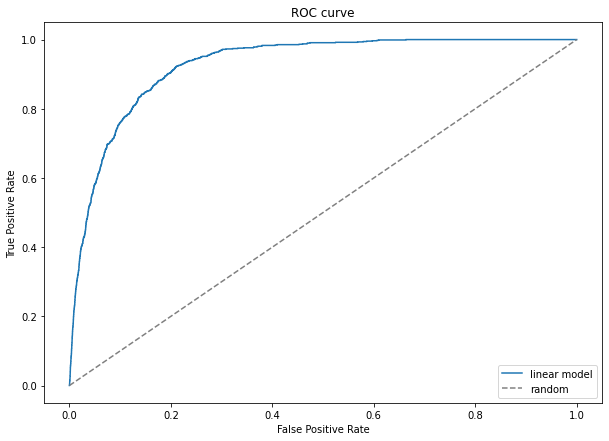

In [52]:
fpr, tpr, _ = metrics.roc_curve(y_test, probability_predictions[:,1])

pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

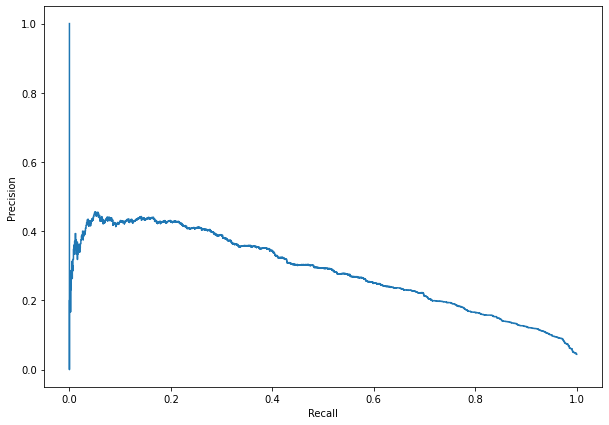

In [53]:
precision, recall, _ = metrics.precision_recall_curve(y_test, probability_predictions[:,1])
disp = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [54]:
metrics.average_precision_score(y_test, predictions)

0.0517182584420465

In [55]:
metrics.log_loss(y_test, probability_predictions[:,1])

0.0875023450349524

# Метрики Регрессии

In [56]:
df_train['target'] = (df_train['winPlacePerc'] > 0.5).astype(np.int8)
drop_cols = ['matchType', 'Id', 'groupId', 'matchId', # id которые затруднительно напрямую использовать
             'winPlacePerc', 'target'] # связаны с таргетом

df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(-1, inplace=True)

X = df_train.drop(drop_cols, 1)
y = df_train['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=seed)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
predictions = lr.predict(X_test)

<AxesSubplot:xlabel='winPlacePerc'>

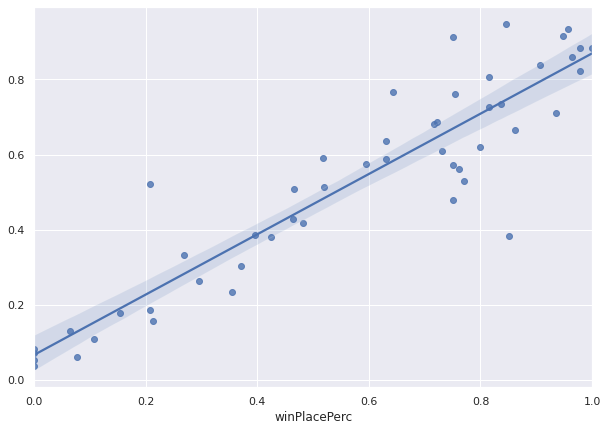

In [58]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.regplot(x=y_test[:50], y=predictions[:50])

In [59]:
metrics.mean_absolute_error(y_test, predictions)

0.09234051298411151

In [60]:
metrics.mean_squared_error(y_test, predictions)

0.015895725044624193

In [62]:
predictions.min()

-0.20138526485031294

In [63]:
predictions[predictions<0] = 0

In [64]:
metrics.mean_squared_log_error(y_test, predictions)

0.007281465032548327

# Валидация

In [65]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,target
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,0


In [66]:
X = df_train.drop(drop_cols, 1)
y = df_train['target']

In [70]:
X.shape

(100000, 24)

In [69]:
# train/test split

from sklearn.model_selection import train_test_split

seed = 0xEDA # 16-ричный инт
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True, random_state=seed)
print(y_train.mean(), y_test.mean())

0.45744285714285715 0.45713333333333334


In [70]:
# train/test split - stratify

from sklearn.model_selection import train_test_split

seed = 0xEDA # 16-ричный инт
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True, random_state=seed, stratify=y)
print(y_train.mean(), y_test.mean())

0.45735714285714285 0.4573333333333333


## k-folds

In [76]:
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, TimeSeriesSplit

nfold = 5
skf = list(StratifiedKFold(n_splits=nfold, 
                           random_state=0xEEE, 
                           shuffle=True).split(X, y))

In [78]:
skf[0]

(array([    0,     1,     2, ..., 99997, 99998, 99999]),
 array([    4,    16,    17, ..., 99983, 99988, 99995]))

In [74]:
gkf = GroupKFold(n_splits=5).split(X, y, groups=df_train['matchId'])

In [ ]:
# TimeSeriesSplit()

In [75]:
# я обычно делаю так...
for fold_, (train_idx, val_idx) in enumerate(skf):
    train, val = X.iloc[train_idx], X.iloc[val_idx]
    # fit model

In [79]:
# в GroupKFold нельзя передать random state, shuffle 

nfold = 5
skf = list(GroupKFold(n_splits=nfold).split(X, y, df_train['matchId']))